In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import linearRegression as lr
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(rc={'figure.figsize': (30, 21),
                  "lines.linewidth": 2.5}, font_scale=2)
sns.set_style('whitegrid')
sns.set_palette('hls')

Lets load and look at our data

In [3]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Row number isn't useful so we can just drop it

Let's look at correlation in our data

In [4]:
df = df.iloc[:, 1:]

[Text(0.5, 1.0, 'Corelation between variables in dataset')]

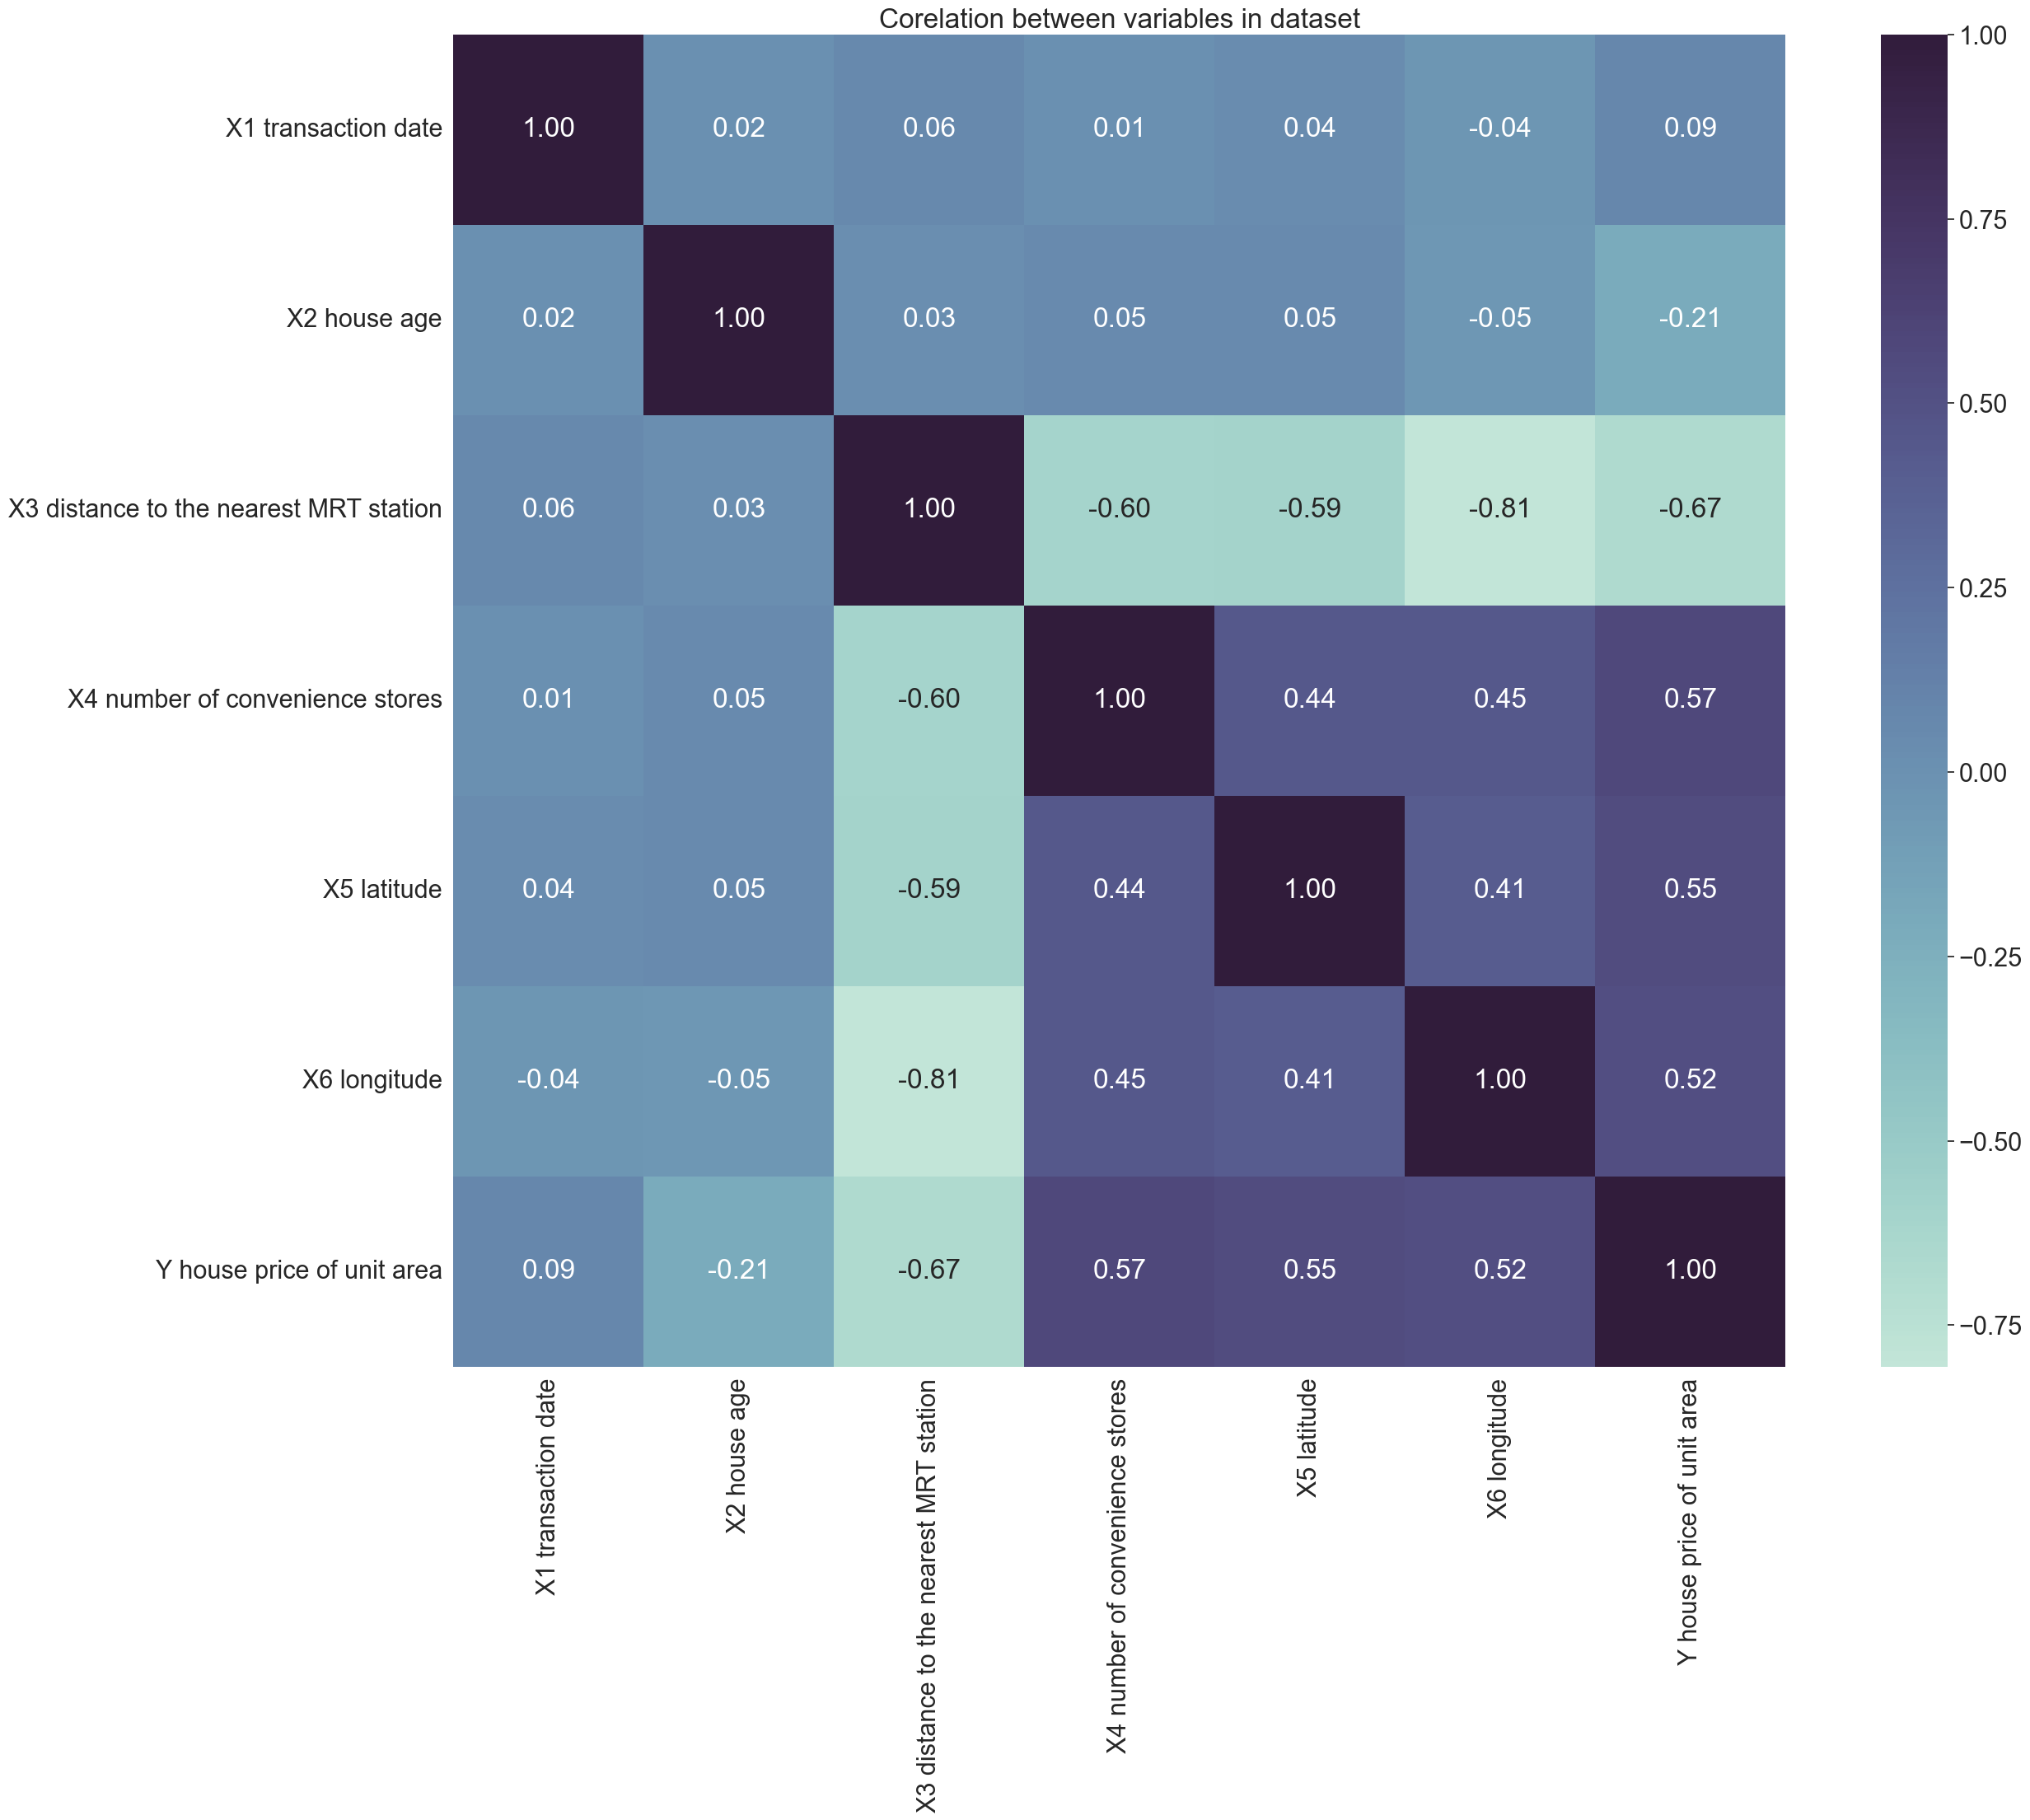

In [5]:
sns.heatmap(df.select_dtypes('number').corr(method='pearson'),
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
            fmt=".2f", annot=True, square=True).set(title='Corelation between variables in dataset')

Transaction data has no correlation with our target variable, so we can drop it too

In [6]:
df = df.iloc[:, 1:]

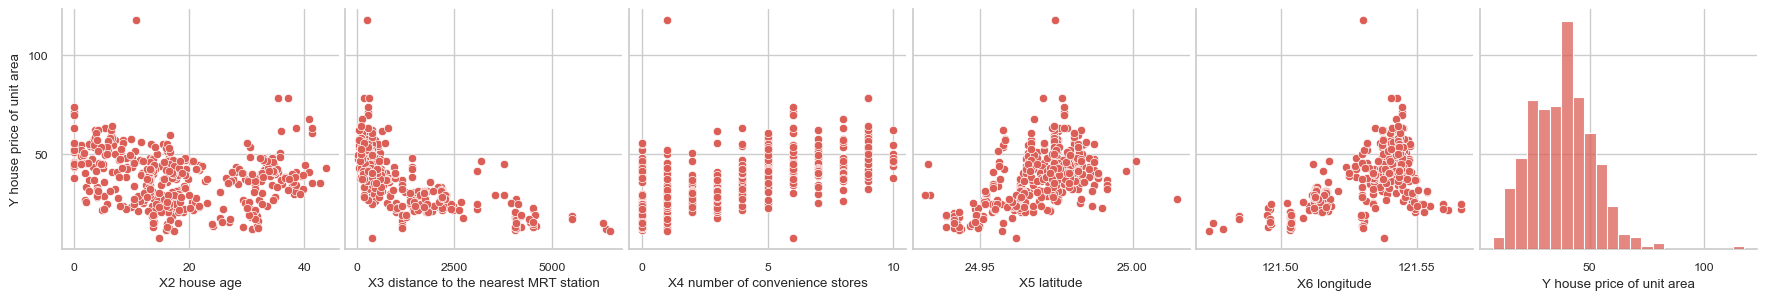

In [7]:
sns.set_theme(rc={
                  "lines.linewidth": 2.5}, font_scale=0.8)
sns.set_style('whitegrid')
sns.set_palette('hls')

sns.pairplot(df, y_vars='Y house price of unit area', height=3)

sns.set_theme(rc={'figure.figsize': (30, 21),
                  "lines.linewidth": 2.5}, font_scale=2)
sns.set_style('whitegrid')
sns.set_palette('hls')

Let's sample 50% of our data for training the model, and the rest of it for evaluating it.

Data sampling and model training

In [8]:
training_sample = df.sample(frac=0.5)
evaluating_sample = df.loc[[i not in list(training_sample.index) for i in list(df.index)]]

In [9]:
x_training = training_sample.iloc[:, :-1].to_numpy()
y_training = training_sample.iloc[:, -1].to_numpy()

x_evaluating = evaluating_sample.iloc[:, :-1].to_numpy()
y_evaluating = evaluating_sample.iloc[:, -1].to_numpy()

In [10]:
real_estate_model = lr.LinearRegression()
real_estate_model.fit(y_training, x_training)

Model evaluating

In [11]:
real_estate_model.evaluate(y_evaluating, x_evaluating)

RegressionEvaluation(MSE=106.35726814138948, RMSE=10.312966020567966, MAE=6.781963525813832)

Let's check if the longtitude of the house is useful for our model
We'll do it performing F-test, using sum squared residuals of our initial model and simplified model without longtitude
To be fair we'll use same training and evaluating data for simpler model

In [12]:
simpler_model = lr.LinearRegression()

In [13]:
simpler_model.fit(y_training, x_training[:, :-1])

In [14]:
lr.compare(real_estate_model, simpler_model, y_evaluating, x_evaluating, [-1])

TestingResult(statistic=161.50117846891123, pvalue=0.04999174553331265)

According to result longtitude is useful paramater in our model with level of significance 0.05
Now let's look more closely at our model's prediction
We'll build 3 plots: 
- Y compared to Y predicted
- Y to residuals
- density of residuals

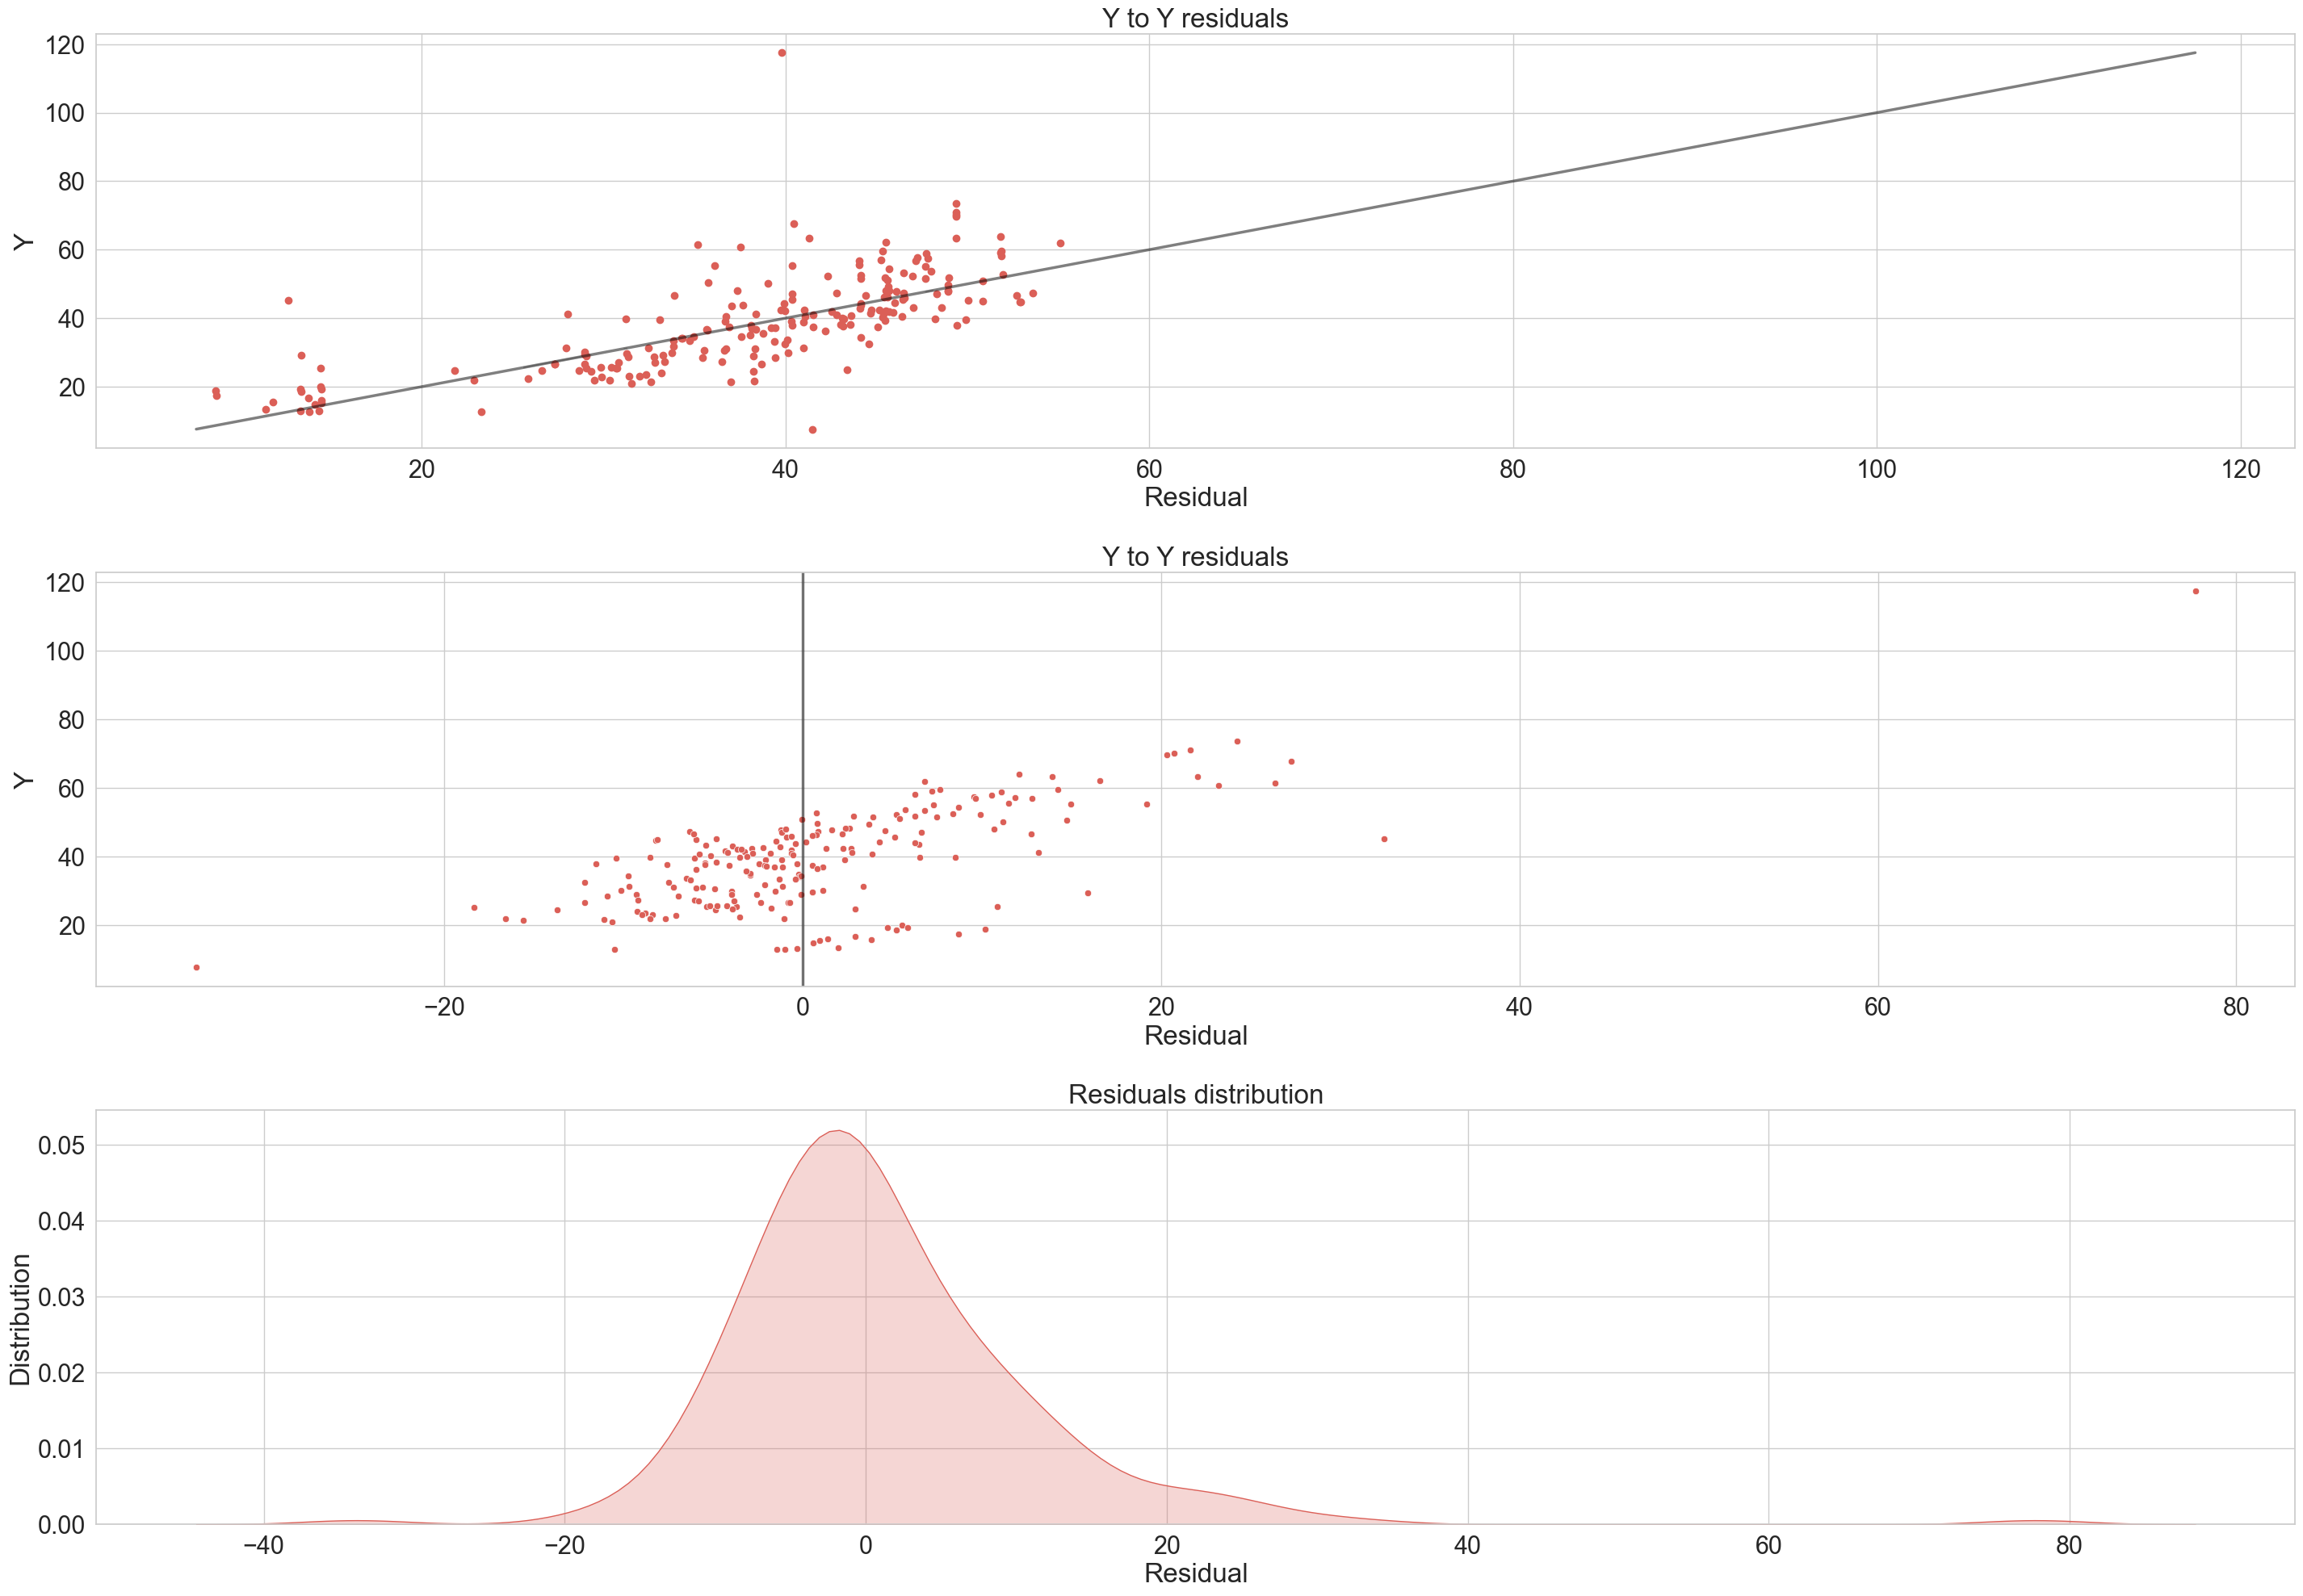

In [15]:
lr.residual_analysis(real_estate_model, y_evaluating, x_evaluating)
plt.show()